In [ ]:
!pip install tensorflow keras numpy pandas opencv-python kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahithavundavalli","key":"e3bafa754fce9df66aa98bcd654a41f3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0726.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0727.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0728.jpg  
  inflating: dataset/Training/g

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15
NUM_CLASSES = 4

train_dir = '/content/dataset/Training'
test_dir = '/content/dataset/Testing'

In [ ]:
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation and test generators (no augmentation)
val_test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
import tensorflow as tf

def build_model():
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
    )
    base_model.trainable = False  # Freeze base model

    inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_model()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 109s 650ms/step - accuracy: 0.6870 - loss: 0.9112 - val_accuracy: 0.7572 - val_loss: 0.6036
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 78s 546ms/step - accuracy: 0.8546 - loss: 0.3794 - val_accuracy: 0.7730 - val_loss: 0.5387
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 551ms/step - accuracy: 0.8584 - loss: 0.3609 - val_accuracy: 0.8081 - val_loss: 0.4842
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 554ms/step - accuracy: 0.8696 - loss: 0.3334 - val_accuracy: 0.8247 - val_loss: 0.4773
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 554ms/step - accuracy: 0.8893 - loss: 0.2961 - val_accuracy: 0.8457 - val_loss: 0.3973
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 77s 539ms/step - accuracy: 0.8946 - loss: 0.2681 - val_accuracy: 0.8387 - val_loss: 0.4063
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 79s 550ms/step - accuracy: 0.8892 - loss: 0.2831 - val_accuracy: 0.8519 - val_loss: 0.4182
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 77s 539ms/step - accuracy: 0.8911 - loss: 

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.8047 - loss: 0.4614

Test Accuracy: 87.03%


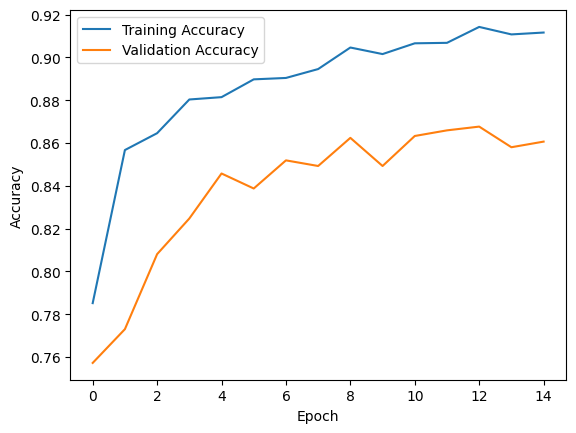

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step


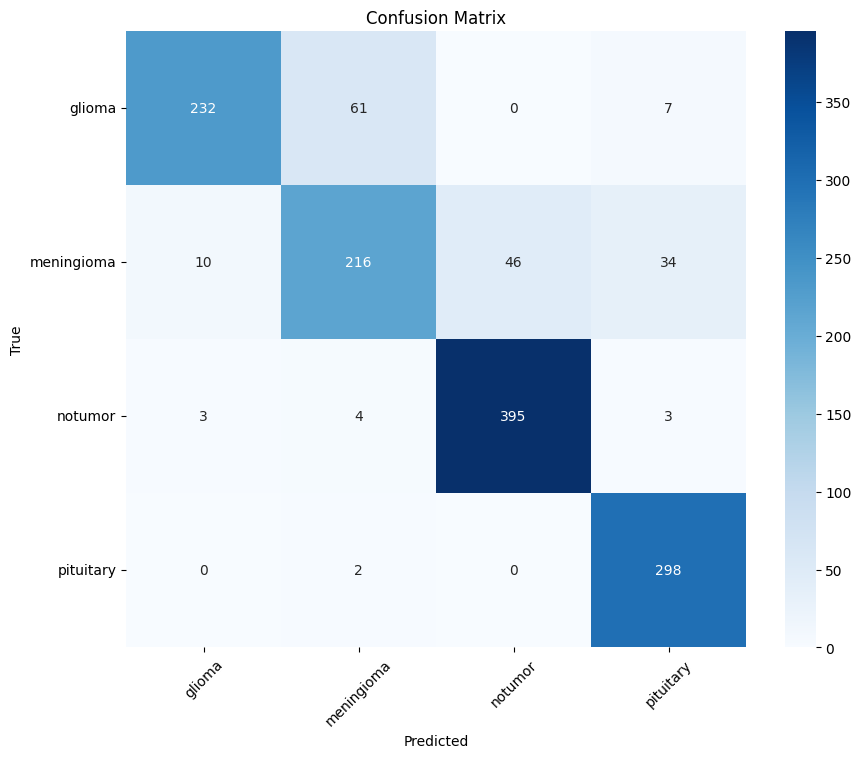


Classification Report:
              precision    recall  f1-score   support

      glioma       0.95      0.77      0.85       300
  meningioma       0.76      0.71      0.73       306
     notumor       0.90      0.98      0.93       405
   pituitary       0.87      0.99      0.93       300

    accuracy                           0.87      1311
   macro avg       0.87      0.86      0.86      1311
weighted avg       0.87      0.87      0.87      1311



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Optional: Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))